In [1]:
from langchain.llms.openai import OpenAI
from langchain.chat_models import ChatOpenAI

llm = OpenAI(model_name="gpt-3.5-turbo-1106")
chat = ChatOpenAI(model_name="gpt-3.5-turbo")

a = llm.predict("행성은 몇개가 있나요?")  # davinci
b = chat.predict("행성은 몇개가 있나요?") # gpt-3.5-turbo

a,b


c:\STUDY\Programing\Python\gpt\3\env\lib\site-packages\langchain\llms\openai.py:216: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain.chat_models import ChatOpenAI`
  warnings.warn(
c:\STUDY\Programing\Python\gpt\3\env\lib\site-packages\langchain\llms\openai.py:811: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain.chat_models import ChatOpenAI`
  warnings.warn(


('태양계에는 8개의 행성이 있습니다. 수성, 금성, 지구, 화성, 목성, 토성, 천왕성, 명왕성입니다. 하지만 명왕성은 왜도에 위치하고 있으며 행성으로 인정받지 못하고 있습니다.',
 '태양계에는 8개의 행성이 있습니다. 이들은 수성, 금성, 지구, 화성, 목성, 토성, 천왕성, 해왕성입니다. 추가로, 2006년에 소행성인 명왕성이 행성이 아니라는 결정을 했지만, 여전히 일반적으로 행성으로 간주됩니다.')

In [2]:
chat = ChatOpenAI(
    model_name="gpt-3.5-turbo",
    temperature=0.1 # 창의성을 나타내는 지표. 높을수록 창의적
)

from langchain.schema import HumanMessage, AIMessage, SystemMessage
# AIMessage : AI에 의해 보내지는거
# SystemMessage : 우리가 LLM에 설정들을 제공하기 위한 Message

messages = [
    SystemMessage(content="당신은 지리학자입니다. 당신은 오직 이탈리아어로 대답합니다."),
    # SystemMessage(content="you are a geography expert. And you only reply in italian."),
    AIMessage(content="ciao, mi chiamo Paolo"),
    HumanMessage(content="멕시코와 태국 사이의 거리는 어떻게 되나요? 그리고 당신의 이름은 무엇인가요?")
]

chat.predict_messages(messages)

AIMessage(content='Mi dispiace, ma 저는 이탈리아어로만 대답할 수 있습니다. 멕시코와 태국 사이의 거리는 대략 15,000km 정도입니다. 제 이름은 파올로입니다.')

In [3]:
from langchain.chat_models import ChatOpenAI
from langchain.prompts import PromptTemplate, ChatPromptTemplate
# ChatPromptTemplate : template을 message로 부터 만든다.
# PromptTemplate : string 으로 template을 만든다.

from langchain.callbacks import StreamingStdOutCallbackHandler # 답변 생성하는 과정 볼 수 있게

template = PromptTemplate.from_template("{국가1}과 {국가2}의 거리가 어떻게 되나요?")

chat = ChatOpenAI(
    model_name="gpt-3.5-turbo",
    callbacks=[StreamingStdOutCallbackHandler()],
    temperature=0.1 # 창의성을 나타내는 지표. 높을수록 창의적
)

prompt = template.format(국가1='대한민국', 국가2='미국')

chat.predict(prompt)

'대한민국과 미국 사이의 거리는 직선거리로 약 10,000km 정도입니다. 하지만 실제로 이동할 때에는 비행기나 배 등을 이용하여 이동해야 하므로 실제 이동 거리는 더 길어질 수 있습니다. 대한민국과 미국은 태평양에 위치해 있기 때문에 이동 거리가 상당히 멀다고 할 수 있습니다.'

In [4]:
template = ChatPromptTemplate.from_messages([
    ("system", "당신은 지리학자입니다. 당신은 오직 {언어}로 대답합니다."),
    ("ai", "ciao, mi chiamo {이름}"),
    ("human", "{국가1}과 {국가2}의 거리가 어떻게 되나요? 그리고 당신의 이름은 무엇인가요?")
])

prompt = template.format_messages(
    언어 = "italian",
    이름 = "pauolo",
    국가1 = "대한민국",
    국가2 = "미국"
)

chat.predict_messages(prompt)

AIMessage(content='Ciao! Mi chiamo Paolo. La distanza tra la Corea del Sud e gli Stati Uniti dipende dalla città di partenza e di arrivo. Ad esempio, la distanza tra Seoul e New York City è di circa 11,000 chilometri.')

In [5]:
# 항상 텍스트로 대답하는 llm의 대답을 원하는 형태로 만들어보자
from langchain.schema import BaseOutputParser

class CommaOutputParser(BaseOutputParser):
    def parse(self, text):
        items = text.strip().split(",")
        return list(map(str.strip, items))

p = CommaOutputParser()
p.parse("Hello, world")

['Hello', 'world']

In [6]:
template = ChatPromptTemplate.from_messages([
    ("system", "You are a list generating machine. Everything you are asked will be answered with a comma separated list of max {max_items} in lowercase.Do NOT reply with anything else."),
    ("human", "{question}")
])

prompt = template.format_messages(
    max_items=10, 
    question="색상이 뭐가 있을까?"
)

result = chat.predict_messages(prompt)
result

AIMessage(content='빨강, 주황, 노랑, 초록, 파랑, 남색, 보라, 핑크, 갈색, 회색')

In [7]:
p = CommaOutputParser()
p.parse(result.content)

['빨강', '주황', '노랑', '초록', '파랑', '남색', '보라', '핑크', '갈색', '회색']

In [8]:
chain = template | chat | CommaOutputParser()
chain.invoke({
    "max_items":5,
    "question":"포켓몬 종류 말해줘"
})

['피카츄', '파이리', '꼬부기', '이상해씨', '꼬마돌']

In [9]:
from langchain.callbacks import StreamingStdOutCallbackHandler
from langchain.chat_models import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.schema import StrOutputParser
from langchain.callbacks.manager import CallbackManager

# 스트리밍 콜백 핸들러 생성
streaming_handler = StreamingStdOutCallbackHandler()

# 콜백 매니저 생성
callback_manager = CallbackManager([streaming_handler])

# ChatOpenAI 모델 초기화
chat = ChatOpenAI(
    model_name="gpt-3.5-turbo",
    temperature=0.1,
    callback_manager=callback_manager,
    streaming=True
)

# 첫 번째 쉐프 프롬프트
chef_prompt = ChatPromptTemplate.from_messages([
    ("system", "당신은 월드클래스 국제 요리사입니다. 당신은 어떤 종류의 요리든 쉽게 구할 수 있는 재료로 따라하기 쉬운 레시피를 만들어 줍니다."),
    ("human", "나는 {cuisine}를 요리하기 원합니다.")
])

# 채식주의자 쉐프 프롬프트
veg_chef_prompt = ChatPromptTemplate.from_messages([
    ("system", "당신은 채식주의자를 위한 세프입니다. 전통적인 채식주의자용 레시피에 특화되어 있습니다. 당신은 대체 재료를 찾고, 준비하는 방법에 대해 설명합니다. 기존 레시피를 너무 많이 변경해서는 안됩니다. 만약 다른 대체품이 없다면 그냥 레시피를 모른다고 말하세요"),
    ("human", "{recipe}")
])

# 체인 구성
chef_chain = chef_prompt | chat | StrOutputParser()
veg_chain = veg_chef_prompt | chat | StrOutputParser()

# 최종 체인 구성
final_chain = {"recipe": chef_chain} | veg_chain

# 체인 실행
print("일반 요리사의 레시피:")
result = final_chain.invoke({"cuisine": "indian"})

print("\n채식주의자 요리사의 레시피:")
print(result)

일반 요리사의 레시피:
인도 요리는 매우 다양하고 맛있는데, 그 중에서도 쉽게 만들 수 있는 "인도식 치킨 커리" 레시피를 알려드리겠습니다.

인도식 치킨 커리 레시피:

재료:
- 닭가슴살 500g
- 양파 1개
- 마늘 3쪽
- 생강 1조각 (약 2cm)
- 토마토 2개
- 코리앤더 가루 1큰술
- 케이프 1큰술
- 고추가루 1큰술
- 소금 약간
- 식용유 2큰술
- 물 1컵

1. 양파, 마늘, 생강을 다듬어 다져놓습니다.
2. 닭가슴살을 한입 크기로 잘라놓습니다.
3. 팬에 식용유를 두르고 양파, 마늘, 생강을 볶아줍니다.
4. 양파가 투명해지면 닭가슴살을 넣고 볶아줍니다.
5. 토마토를 다져서 넣고 볶아줍니다.
6. 코리앤더 가루, 케이프, 고추가루, 소금을 넣고 볶아줍니다.
7. 물을 넣고 뚜껑을 덮어 약불에서 15분간 끓입니다.
8. 뚜껑을 열고 끓여 만든 소스가 뿌옇게 될 때까지 끓여줍니다.
9. 밥이나 나안을 곁들여 인도식 치킨 커리를 즐기세요.

이렇게 간단하게 만들 수 있는 인도식 치킨 커리는 매우 맛있고 가정에서도 쉽게 만들 수 있습니다. 매운맛을 좋아하신다면 고추가루를 더 넣어 매콤하게 조리해도 좋습니다.즐겨보세요!채식주의자를 위한 대체재료로는 대체로 닭가슴살 대신 대체육이나 대체 단백질 소스를 사용할 수 있습니다. 대체육 상품은 대부분 슈퍼마켓이나 온라인에서 구매할 수 있습니다. 대체 단백질 소스로는 대체로 두부, 콩, 혹은 채소 단백질이 들어간 대체육을 사용할 수 있습니다. 이러한 대체재료를 사용하여 전통적인 인도식 치킨 커리 레시피를 준비하면 채식주의자도 즐길 수 있는 맛있는 요리를 즐길 수 있습니다.
채식주의자 요리사의 레시피:
채식주의자를 위한 대체재료로는 대체로 닭가슴살 대신 대체육이나 대체 단백질 소스를 사용할 수 있습니다. 대체육 상품은 대부분 슈퍼마켓이나 온라인에서 구매할 수 있습니다. 대체 단백질 소스로는 대체로 두부, 콩, 혹은 채소 단백질이 들어간 대체육을 사용할 수 있습니다. 이러한 대체재료를 사용하여 전통적인 인

In [10]:
from langchain.chat_models import ChatOpenAI
from langchain.prompts import PromptTemplate
from langchain.prompts.few_shot import FewShotPromptTemplate
from langchain.callbacks import StreamingStdOutCallbackHandler

chat = ChatOpenAI(
    temperature=0.1, 
    streaming=True, 
    callbacks=[
        StreamingStdOutCallbackHandler(),
    ],
)

# t = PromptTemplate(
#     template="{국가}의 수도는 어디인가요?",
#     input_variables=["country"]
# )

# t.format(국가="미국")

chat.predict("프랑스에 대해 무엇을 알고 있어?")

프랑스는 유럽 대륙의 서쪽에 위치한 나라로 파리를 수도로 하고 있습니다. 프랑스는 세계적으로 유명한 문화와 예술의 중심지로서 유명하며, 에펠탑, 루브르 박물관, 베르사유 궁전 등 많은 유명한 관광지가 있습니다. 또한 프랑스는 와인, 치즈, 요리 등의 다양한 음식 문화로도 유명하며, 세계적으로 유명한 디자이너 브랜드들이 많이 탄생한 곳으로도 알려져 있습니다. 프랑스는 또한 유럽 연합의 주요 회원국 중 하나이며, 세계 경제에서도 중요한 역할을 하는 나라 중 하나입니다.

'프랑스는 유럽 대륙의 서쪽에 위치한 나라로 파리를 수도로 하고 있습니다. 프랑스는 세계적으로 유명한 문화와 예술의 중심지로서 유명하며, 에펠탑, 루브르 박물관, 베르사유 궁전 등 많은 유명한 관광지가 있습니다. 또한 프랑스는 와인, 치즈, 요리 등의 다양한 음식 문화로도 유명하며, 세계적으로 유명한 디자이너 브랜드들이 많이 탄생한 곳으로도 알려져 있습니다. 프랑스는 또한 유럽 연합의 주요 회원국 중 하나이며, 세계 경제에서도 중요한 역할을 하는 나라 중 하나입니다.'

In [11]:
examples = [
    {
        "question": "What do you know about France?",
        "answer": """
        Here is what I know:
        Capital: Paris
        Language: French
        Food: Wine and Cheese
        Currency: Euro
        """,
    },
    {
        "question": "What do you know about Italy?",
        "answer": """
        I know this:
        Capital: Rome
        Language: Italian
        Food: Pizza and Pasta
        Currency: Euro
        """,
    },
    {
        "question": "What do you know about Greece?",
        "answer": """
        I know this:
        Capital: Athens
        Language: Greek
        Food: Souvlaki and Feta Cheese
        Currency: Euro
        """,
    },
]

example_template="""
    Human: {question}
    AI: {answer}
"""

example_prompt = PromptTemplate.from_template(example_template)

prompt = FewShotPromptTemplate(
    example_prompt=example_prompt,
    examples=examples,
    suffix="Human: {country}에 대해 무엇을 알고 있어?",
    input_variables=["country"]
)

prompt.format(country="프랑스")

'\n    Human: What do you know about France?\n    AI: \n        Here is what I know:\n        Capital: Paris\n        Language: French\n        Food: Wine and Cheese\n        Currency: Euro\n        \n\n\n\n    Human: What do you know about Italy?\n    AI: \n        I know this:\n        Capital: Rome\n        Language: Italian\n        Food: Pizza and Pasta\n        Currency: Euro\n        \n\n\n\n    Human: What do you know about Greece?\n    AI: \n        I know this:\n        Capital: Athens\n        Language: Greek\n        Food: Souvlaki and Feta Cheese\n        Currency: Euro\n        \n\n\nHuman: 프랑스에 대해 무엇을 알고 있어?'

In [12]:
chain = prompt | chat

chain.invoke({
    "country":"미국"
})

AI: 
미국에 대해 알고 있는 정보는 다음과 같습니다:
수도: Washington D.C.
언어: 영어
음식: 핫도그, 햄버거
통화: 미국 달러

AIMessageChunk(content='AI: \n미국에 대해 알고 있는 정보는 다음과 같습니다:\n수도: Washington D.C.\n언어: 영어\n음식: 핫도그, 햄버거\n통화: 미국 달러')

In [13]:
from langchain.chat_models import ChatOpenAI
from langchain.prompts.few_shot import FewShotChatMessagePromptTemplate
from langchain.callbacks import StreamingStdOutCallbackHandler
from langchain.prompts import ChatMessagePromptTemplate, ChatPromptTemplate

examples = [
    {
        "country": "France?",
        "answer": """
        Here is what I know:
        Capital: Paris
        Language: French
        Food: Wine and Cheese
        Currency: Euro
        """,
    },
    {
        "country": "Italy?",
        "answer": """
        I know this:
        Capital: Rome
        Language: Italian
        Food: Pizza and Pasta
        Currency: Euro
        """,
    },
    {
        "country": "Greece?",
        "answer": """
        I know this:
        Capital: Athens
        Language: Greek
        Food: Souvlaki and Feta Cheese
        Currency: Euro
        """,
    },
]

example_prompt = ChatPromptTemplate.from_messages([
    ("human", "What do you know about {country}?"),
    ("ai", "{answer}")
])

example_prompt = FewShotChatMessagePromptTemplate(
    example_prompt=example_prompt,
    examples=examples,
)

final_prompt = ChatPromptTemplate.from_messages([
    ("system", "you are a geography expert, you give short answers"),
    example_prompt,
    ("human", "What do you know about {country}?")
])

chain = final_prompt | chat

chain.invoke({
    "country":"미국"
})

미국 is the Korean name for the United States. Here is some information:
        Capital: Washington, D.C.
        Language: English
        Food: Burgers and Hotdogs
        Currency: US Dollar

AIMessageChunk(content='미국 is the Korean name for the United States. Here is some information:\n        Capital: Washington, D.C.\n        Language: English\n        Food: Burgers and Hotdogs\n        Currency: US Dollar')

In [14]:
from langchain.prompts.example_selector import LengthBasedExampleSelector


chat = ChatOpenAI(
    temperature=0.1,
    streaming=True,
    callbacks=[
        StreamingStdOutCallbackHandler(),
    ],
)


examples = [
    {
        "question": "What do you know about France?",
        "answer": """
        Here is what I know:
        Capital: Paris
        Language: French
        Food: Wine and Cheese
        Currency: Euro
        """,
    },
    {
        "question": "What do you know about Italy?",
        "answer": """
        I know this:
        Capital: Rome
        Language: Italian
        Food: Pizza and Pasta
        Currency: Euro
        """,
    },
    {
        "question": "What do you know about Greece?",
        "answer": """
        I know this:
        Capital: Athens
        Language: Greek
        Food: Souvlaki and Feta Cheese
        Currency: Euro
        """,
    },
]


example_prompt = PromptTemplate.from_template("Human:{question}\nAI:{answer}")

example_selector = LengthBasedExampleSelector(
    examples=examples, 
    example_prompt=example_prompt,
    max_length=80
)

example_prompt = FewShotPromptTemplate(
    example_prompt=example_prompt,
    example_selector=example_selector,
    suffix="Human: {country}에 대해 무엇을 알고 있어?",
    input_variables=["country"]
)

prompt.format(country="영국")

'\n    Human: What do you know about France?\n    AI: \n        Here is what I know:\n        Capital: Paris\n        Language: French\n        Food: Wine and Cheese\n        Currency: Euro\n        \n\n\n\n    Human: What do you know about Italy?\n    AI: \n        I know this:\n        Capital: Rome\n        Language: Italian\n        Food: Pizza and Pasta\n        Currency: Euro\n        \n\n\n\n    Human: What do you know about Greece?\n    AI: \n        I know this:\n        Capital: Athens\n        Language: Greek\n        Food: Souvlaki and Feta Cheese\n        Currency: Euro\n        \n\n\nHuman: 영국에 대해 무엇을 알고 있어?'

In [15]:
from typing import Dict, List
from langchain.prompts.example_selector.base import BaseExampleSelector

class RandomExampleSelector(BaseExampleSelector):
    def __init__(self, examples):
        self.examples = examples

    def add_example(self, example):
        self.examples.append(example)

    def select_examples(self, input_variables):
        from random import choice

        return [choice(self.examples)]
    
example_prompt = PromptTemplate.from_template("Human: {question}\nAI:{answer}")

example_selector = RandomExampleSelector(
    examples=examples,
)

prompt = FewShotPromptTemplate(
    example_prompt=example_prompt,
    example_selector=example_selector,
    suffix="Human: What do you know about {country}?",
    input_variables=["country"],
)

prompt.format(country="브라질")

'Human: What do you know about Italy?\nAI:\n        I know this:\n        Capital: Rome\n        Language: Italian\n        Food: Pizza and Pasta\n        Currency: Euro\n        \n\nHuman: What do you know about 브라질?'

In [16]:
from langchain.chat_models  import ChatOpenAI
from langchain.callbacks import StreamingStdOutCallbackHandler
from langchain.prompts import load_prompt

# prompt = load_prompt("./prompt.json")
prompt = load_prompt("./prompt.yaml")

chat = ChatOpenAI(
    temperature=0.1,
    streaming=True,
    callbacks=[
        StreamingStdOutCallbackHandler(),
    ]
)

prompt.format(country="Germany")

'What is the capital of Germany'

In [17]:
from langchain.prompts.pipeline import PipelinePromptTemplate

intro = PromptTemplate.from_template(
    """
    너는 롤 플레잉 어시스턴트야.
    너는 {character}을 흉내내고 있어.
    """
)


example = PromptTemplate.from_template(
    """
    이것은 니가 말하는 방식의 예시야:
    
    Human: {example_question}
    You: {example_answer}
    """
)

start = PromptTemplate.from_template(
    """
    시작한다!
    Human: {question}
    You: 
    """
)

final = PromptTemplate.from_template(
    """
    {intro}

    {example}

    {start}
    """
)

prompts = [
    ("intro", intro),
    ("example", example),
    ("start", start)
]

full_prompt = PipelinePromptTemplate(final_prompt=final, pipeline_prompts=prompts)

full_prompt.format(
    character="피카츄",
    example_question="너 어디있어?",
    example_answer="피카피카 나는 부산에 있어. 삐까츄~",
    question="니가 제일 좋아하는 음식이 뭐야?"
)

'\n    \n    너는 롤 플레잉 어시스턴트야.\n    너는 피카츄을 흉내내고 있어.\n    \n\n    \n    이것은 니가 말하는 방식의 예시야:\n    \n    Human: 너 어디있어?\n    You: 피카피카 나는 부산에 있어. 삐까츄~\n    \n\n    \n    시작한다!\n    Human: 니가 제일 좋아하는 음식이 뭐야?\n    You: \n    \n    '

In [18]:
chain = full_prompt | chat

chain.invoke({
    "character":"피카츄",
    "example_question":"너 어디있어?",
    "example_answer":"피카피카 나는 부산에 있어. 삐까츄~",
    "question":"니가 제일 좋아하는 음식이 뭐야?"
})

피카츄! 나는 과일을 좋아해. 피카피카~

AIMessageChunk(content='피카츄! 나는 과일을 좋아해. 피카피카~')

In [19]:
from langchain.globals import set_llm_cache # LLM의 응답을 저장
from langchain.cache import InMemoryCache

set_llm_cache(InMemoryCache())

chat = ChatOpenAI(
    temperature=0.1,
    # streaming=True,
    # callbacks=[
    #     StreamingStdOutCallbackHandler(),
    # ]
)

chat.predict("이탈리아 파스타는 어떻게 만드나요?") #5.9s가 걸렸지만

'이탈리아 파스타를 만드는 방법은 다양하지만, 전통적인 방법은 다음과 같습니다:\n\n1. 물에 소금을 넣고 끓인 후 파스타를 넣어서 삶습니다. 삶는 시간은 각 종류마다 다르므로 포장지에 적힌 시간을 참고하세요.\n\n2. 파스타를 삶는 동안, 별도의 팬에 올리브 오일을 데워 양파와 마늘을 볶습니다.\n\n3. 볶은 양파와 마늘에 토마토 소스를 넣고 약간의 소금과 후추로 간을 해줍니다.\n\n4. 삶은 파스타를 물기를 제거하고 소스에 넣어 섞어줍니다.\n\n5. 마지막으로 파마산 치즈나 파슬리를 곁들여서 내놓으면 완성입니다.\n\n이 외에도 다양한 파스타 레시피가 있으니 자신이 좋아하는 재료와 소스를 활용하여 맛있는 이탈리아 파스타를 만들어보세요.'

In [20]:
chat.predict("이탈리아 파스타는 어떻게 만드나요?") # 같은 질문을 하면 0.8s 걸린다.

'이탈리아 파스타를 만드는 방법은 다양하지만, 전통적인 방법은 다음과 같습니다:\n\n1. 물에 소금을 넣고 끓인 후 파스타를 넣어서 삶습니다. 삶는 시간은 각 종류마다 다르므로 포장지에 적힌 시간을 참고하세요.\n\n2. 파스타를 삶는 동안, 별도의 팬에 올리브 오일을 데워 양파와 마늘을 볶습니다.\n\n3. 볶은 양파와 마늘에 토마토 소스를 넣고 약간의 소금과 후추로 간을 해줍니다.\n\n4. 삶은 파스타를 물기를 제거하고 소스에 넣어 섞어줍니다.\n\n5. 마지막으로 파마산 치즈나 파슬리를 곁들여서 내놓으면 완성입니다.\n\n이 외에도 다양한 파스타 레시피가 있으니 자신이 좋아하는 재료와 소스를 활용하여 맛있는 이탈리아 파스타를 만들어보세요.'

In [21]:
from langchain.globals import set_llm_cache, set_debug # set_debug 모드로 출력결과가 상세히 나옴

set_debug(True)

chat.predict("이탈리아 파스타는 어떻게 만드나요?")

[llm/start] [1:llm:ChatOpenAI] Entering LLM run with input:
{
  "prompts": [
    "Human: 이탈리아 파스타는 어떻게 만드나요?"
  ]
}
[llm/end] [1:llm:ChatOpenAI] s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "이탈리아 파스타를 만드는 방법은 다양하지만, 전통적인 방법은 다음과 같습니다:\n\n1. 물에 소금을 넣고 끓인 후 파스타를 넣어서 삶습니다. 삶는 시간은 각 종류마다 다르므로 포장지에 적힌 시간을 참고하세요.\n\n2. 파스타를 삶는 동안, 별도의 팬에 올리브 오일을 데워 양파와 마늘을 볶습니다.\n\n3. 볶은 양파와 마늘에 토마토 소스를 넣고 약간의 소금과 후추로 간을 해줍니다.\n\n4. 삶은 파스타를 물기를 제거하고 소스에 넣어 섞어줍니다.\n\n5. 마지막으로 파마산 치즈나 파슬리를 곁들여서 내놓으면 완성입니다.\n\n이 외에도 다양한 파스타 레시피가 있으니 자신이 좋아하는 재료와 소스를 활용하여 맛있는 이탈리아 파스타를 만들어보세요.",
        "generation_info": {
          "finish_reason": "stop"
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
          "kwargs": {
            "content": "이탈리아 파스타를 만드는 방법은 다양하지만, 전통적인 방법은 다음과 같습니다:\n\n1. 

'이탈리아 파스타를 만드는 방법은 다양하지만, 전통적인 방법은 다음과 같습니다:\n\n1. 물에 소금을 넣고 끓인 후 파스타를 넣어서 삶습니다. 삶는 시간은 각 종류마다 다르므로 포장지에 적힌 시간을 참고하세요.\n\n2. 파스타를 삶는 동안, 별도의 팬에 올리브 오일을 데워 양파와 마늘을 볶습니다.\n\n3. 볶은 양파와 마늘에 토마토 소스를 넣고 약간의 소금과 후추로 간을 해줍니다.\n\n4. 삶은 파스타를 물기를 제거하고 소스에 넣어 섞어줍니다.\n\n5. 마지막으로 파마산 치즈나 파슬리를 곁들여서 내놓으면 완성입니다.\n\n이 외에도 다양한 파스타 레시피가 있으니 자신이 좋아하는 재료와 소스를 활용하여 맛있는 이탈리아 파스타를 만들어보세요.'

In [22]:
from langchain.cache import InMemoryCache, SQLiteCache # SQLiteCache : 데이터베이스에 캐싱

set_llm_cache(SQLiteCache())

chat.predict("이탈리아 파스타는 어떻게 만드나요?")

[llm/start] [1:llm:ChatOpenAI] Entering LLM run with input:
{
  "prompts": [
    "Human: 이탈리아 파스타는 어떻게 만드나요?"
  ]
}
[llm/end] [1:llm:ChatOpenAI] s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "이탈리아 파스타를 만드는 방법은 다양하지만, 전통적인 방법은 다음과 같습니다:\n\n1. 물에 소금을 넣고 끓는 물에 파스타를 넣어서 삶습니다. 대부분의 이탈리아 파스타는 알 데인테(알 데인테)로 삶아내는 것이 좋습니다. 삶는 시간은 각각의 파스타 종류에 따라 다를 수 있습니다.\n\n2. 파스타를 삶는 동안, 별도의 팬에 올리브 오일을 데워 양파와 마늘을 볶습니다. 그 후 토마토 소스나 크림 소스를 넣어서 함께 볶아줍니다.\n\n3. 삶은 파스타를 물에 헹궈 물기를 제거한 후, 팬에 볶은 소스와 섞어줍니다. 파마산 치즈나 파슬리, 후추 등을 넣어 맛을 낸 후에는 그릇에 담아서 내놓습니다.\n\n4. 마지막으로, 파스타 위에 파마산 치즈를 솔솔 뿌려주고 신선한 바질 잎을 올려서 마무리합니다.\n\n이렇게 만들어진 이탈리아 파스타는 집에서도 쉽게 만들 수 있고 맛있게 즐길 수 있습니다.",
        "generation_info": {
          "finish_reason": "stop"
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
          "kwargs

'이탈리아 파스타를 만드는 방법은 다양하지만, 전통적인 방법은 다음과 같습니다:\n\n1. 물에 소금을 넣고 끓는 물에 파스타를 넣어서 삶습니다. 대부분의 이탈리아 파스타는 알 데인테(알 데인테)로 삶아내는 것이 좋습니다. 삶는 시간은 각각의 파스타 종류에 따라 다를 수 있습니다.\n\n2. 파스타를 삶는 동안, 별도의 팬에 올리브 오일을 데워 양파와 마늘을 볶습니다. 그 후 토마토 소스나 크림 소스를 넣어서 함께 볶아줍니다.\n\n3. 삶은 파스타를 물에 헹궈 물기를 제거한 후, 팬에 볶은 소스와 섞어줍니다. 파마산 치즈나 파슬리, 후추 등을 넣어 맛을 낸 후에는 그릇에 담아서 내놓습니다.\n\n4. 마지막으로, 파스타 위에 파마산 치즈를 솔솔 뿌려주고 신선한 바질 잎을 올려서 마무리합니다.\n\n이렇게 만들어진 이탈리아 파스타는 집에서도 쉽게 만들 수 있고 맛있게 즐길 수 있습니다.'

In [23]:
chat.predict("이탈리아 파스타는 어떻게 만드나요?")

[llm/start] [1:llm:ChatOpenAI] Entering LLM run with input:
{
  "prompts": [
    "Human: 이탈리아 파스타는 어떻게 만드나요?"
  ]
}
[llm/end] [1:llm:ChatOpenAI] s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "이탈리아 파스타를 만드는 방법은 다양하지만, 전통적인 방법은 다음과 같습니다:\n\n1. 물에 소금을 넣고 끓는 물에 파스타를 넣어서 삶습니다. 대부분의 이탈리아 파스타는 알 데인테(알 데인테)로 삶아내는 것이 좋습니다. 삶는 시간은 각각의 파스타 종류에 따라 다를 수 있습니다.\n\n2. 파스타를 삶는 동안, 별도의 팬에 올리브 오일을 데워 양파와 마늘을 볶습니다. 그 후 토마토 소스나 크림 소스를 넣어서 함께 볶아줍니다.\n\n3. 삶은 파스타를 물에 헹궈 물기를 제거한 후, 팬에 볶은 소스와 섞어줍니다. 파마산 치즈나 파슬리, 후추 등을 넣어 맛을 낸 후에는 그릇에 담아서 내놓습니다.\n\n4. 마지막으로, 파스타 위에 파마산 치즈를 솔솔 뿌려주고 신선한 바질 잎을 올려서 마무리합니다.\n\n이렇게 만들어진 이탈리아 파스타는 집에서도 쉽게 만들 수 있고 맛있게 즐길 수 있습니다.",
        "generation_info": {
          "finish_reason": "stop"
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
          "kwargs

'이탈리아 파스타를 만드는 방법은 다양하지만, 전통적인 방법은 다음과 같습니다:\n\n1. 물에 소금을 넣고 끓는 물에 파스타를 넣어서 삶습니다. 대부분의 이탈리아 파스타는 알 데인테(알 데인테)로 삶아내는 것이 좋습니다. 삶는 시간은 각각의 파스타 종류에 따라 다를 수 있습니다.\n\n2. 파스타를 삶는 동안, 별도의 팬에 올리브 오일을 데워 양파와 마늘을 볶습니다. 그 후 토마토 소스나 크림 소스를 넣어서 함께 볶아줍니다.\n\n3. 삶은 파스타를 물에 헹궈 물기를 제거한 후, 팬에 볶은 소스와 섞어줍니다. 파마산 치즈나 파슬리, 후추 등을 넣어 맛을 낸 후에는 그릇에 담아서 내놓습니다.\n\n4. 마지막으로, 파스타 위에 파마산 치즈를 솔솔 뿌려주고 신선한 바질 잎을 올려서 마무리합니다.\n\n이렇게 만들어진 이탈리아 파스타는 집에서도 쉽게 만들 수 있고 맛있게 즐길 수 있습니다.'

In [24]:
from langchain.callbacks import get_openai_callback # 사용량을(비용) 볼 수 있다.

chat = ChatOpenAI(
    temperature=0.1,
)

with get_openai_callback() as usage:
    chat.predict("소주는 어떻게 만들어?")
    print(usage)

[llm/start] [1:llm:ChatOpenAI] Entering LLM run with input:
{
  "prompts": [
    "Human: 소주는 어떻게 만들어?"
  ]
}
[llm/end] [1:llm:ChatOpenAI] s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "소주는 주로 쌀을 사용하여 만들어집니다. 먼저 쌀을 씻고 증기를 통해 삶아서 쌀의 전분을 녹인 후 발효시켜 술맥주를 만듭니다. 그 후 술맥주를 증류하여 술을 추출하고 여러 번 걸쳐 여과하여 맑은 술을 얻습니다. 이후 술을 숙성시켜 부드럽고 깔끔한 맛을 내는 과정을 거쳐 완성된 소주가 됩니다.",
        "generation_info": {
          "finish_reason": "stop"
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
          "kwargs": {
            "content": "소주는 주로 쌀을 사용하여 만들어집니다. 먼저 쌀을 씻고 증기를 통해 삶아서 쌀의 전분을 녹인 후 발효시켜 술맥주를 만듭니다. 그 후 술맥주를 증류하여 술을 추출하고 여러 번 걸쳐 여과하여 맑은 술을 얻습니다. 이후 술을 숙성시켜 부드럽고 깔끔한 맛을 내는 과정을 거쳐 완성된 소주가 됩니다.",
            "additional_kwargs": {}
          }
        }
      }
    ]
  ],
  "llm_output": 

In [25]:
with get_openai_callback() as usage:
    a = chat.predict("김치찌개는 어떻게 만들어?")
    b = chat.predict("된장찌개는 어떻게 만들어?")
    print(a, "\n")
    print(b, "\n")
    print(usage)

[llm/start] [1:llm:ChatOpenAI] Entering LLM run with input:
{
  "prompts": [
    "Human: 김치찌개는 어떻게 만들어?"
  ]
}
[llm/end] [1:llm:ChatOpenAI] s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "김치찌개를 만드는 방법은 다음과 같습니다:\n\n재료:\n- 김치 2컵\n- 물 4컵\n- 돼지고기 혹은 소고기 200g\n- 두부 1/2모\n- 대파 1대\n- 양파 1/2개\n- 청양고추 1개\n- 고춧가루 1큰술\n- 고추장 1큰술\n- 간장 1큰술\n- 다진 마늘 1큰술\n- 소금, 후추 약간\n\n1. 냄비에 물을 붓고 김치를 넣어 끓인다.\n2. 돼지고기나 소고기를 넣고 끓인다.\n3. 대파, 양파, 청양고추를 썰어 넣고 끓인다.\n4. 고춧가루, 고추장, 간장, 다진 마늘을 넣고 끓인다.\n5. 두부를 넣고 끓인다.\n6. 소금과 후추로 간을 맞추고 끓인다.\n\n맛있는 김치찌개가 완성되었습니다. 맛있게 드세요!",
        "generation_info": {
          "finish_reason": "stop"
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
          "kwargs": {
            "content": "김치찌개를 만드는 방법은 다음과 같습니다:\n\n재료:\n- 김치 2컵\n- 물 4컵\n- 돼지고기 혹은 소고기 200g

In [26]:
from langchain.memory import ConversationBufferMemory 
# llm은 대화를 저장을 못해. 그래서 문맥을 기억을 못해서 대화하는 기분이 안 날 수 있음.
# 그래서 전체대화를 저장해서 계속 넘겨주는 방식으로 써봄. 굉장히 비효율적

memory = ConversationBufferMemory()

memory.save_context({"input": "Hi!"}, {"output": "How are you?"})

memory.load_memory_variables({})

# 텍스트 자동완성할때 유용

{'history': 'Human: Hi!\nAI: How are you?'}

In [27]:
memory = ConversationBufferMemory(return_messages=True) # chat model을 사용하고 싶을때 return_message True

memory.save_context({"input": "Hi!"}, {"output": "How are you?"})

memory.load_memory_variables({})

{'history': [HumanMessage(content='Hi!'), AIMessage(content='How are you?')]}

In [28]:
memory.save_context({"input": "Hi!"}, {"output": "How are you?"})

memory.load_memory_variables({})

{'history': [HumanMessage(content='Hi!'),
  AIMessage(content='How are you?'),
  HumanMessage(content='Hi!'),
  AIMessage(content='How are you?')]}

In [29]:
memory.save_context({"input": "Hi!"}, {"output": "How are you?"})

memory.load_memory_variables({})

{'history': [HumanMessage(content='Hi!'),
  AIMessage(content='How are you?'),
  HumanMessage(content='Hi!'),
  AIMessage(content='How are you?'),
  HumanMessage(content='Hi!'),
  AIMessage(content='How are you?')]}

In [30]:
memory.save_context({"input": "Hi!"}, {"output": "How are you?"})

memory.load_memory_variables({})

{'history': [HumanMessage(content='Hi!'),
  AIMessage(content='How are you?'),
  HumanMessage(content='Hi!'),
  AIMessage(content='How are you?'),
  HumanMessage(content='Hi!'),
  AIMessage(content='How are you?'),
  HumanMessage(content='Hi!'),
  AIMessage(content='How are you?')]}

In [31]:
from langchain.memory import ConversationBufferWindowMemory 
# 특정 부분만 저장하는 메모리. 예를들어 최근 5개만 저장. 5개가 넘어가면 제일 오래된 것을 날린다.

memory = ConversationBufferWindowMemory(
    return_messages=True,
    k=4 # 몇개 저장할건지
)

def add_msg(input, output):
    memory.save_context({"input": input}, {"output": output})

add_msg(1,1)

In [32]:
add_msg(2,2)
add_msg(3,3)
add_msg(4,4)

memory.load_memory_variables({})

{'history': [HumanMessage(content='1'),
  AIMessage(content='1'),
  HumanMessage(content='2'),
  AIMessage(content='2'),
  HumanMessage(content='3'),
  AIMessage(content='3'),
  HumanMessage(content='4'),
  AIMessage(content='4')]}

In [33]:
add_msg(5,5)
memory.load_memory_variables({})

{'history': [HumanMessage(content='2'),
  AIMessage(content='2'),
  HumanMessage(content='3'),
  AIMessage(content='3'),
  HumanMessage(content='4'),
  AIMessage(content='4'),
  HumanMessage(content='5'),
  AIMessage(content='5')]}

In [34]:
from langchain.memory import ConversationSummaryMemory # 대화를 요약해서 저장한다.
from langchain.chat_models import ChatOpenAI

llm = ChatOpenAI(temperature=0.1)

memory = ConversationSummaryMemory(llm=llm)

def add_msg(input, output):
    memory.save_context({"input": input}, {"output": output})

def get_history():
    return memory.load_memory_variables({})

add_msg("안녕, 나는 해쟈야. 나는 대한민국에 살고 있어.", "와 그거 멋지다!")

[chain/start] [1:chain:LLMChain] Entering Chain run with input:
{
  "summary": "",
  "new_lines": "Human: 안녕, 나는 해쟈야. 나는 대한민국에 살고 있어.\nAI: 와 그거 멋지다!"
}
[llm/start] [1:chain:LLMChain > 2:llm:ChatOpenAI] Entering LLM run with input:
{
  "prompts": [
    "Human: Progressively summarize the lines of conversation provided, adding onto the previous summary returning a new summary.\n\nEXAMPLE\nCurrent summary:\nThe human asks what the AI thinks of artificial intelligence. The AI thinks artificial intelligence is a force for good.\n\nNew lines of conversation:\nHuman: Why do you think artificial intelligence is a force for good?\nAI: Because artificial intelligence will help humans reach their full potential.\n\nNew summary:\nThe human asks what the AI thinks of artificial intelligence. The AI thinks artificial intelligence is a force for good because it will help humans reach their full potential.\nEND OF EXAMPLE\n\nCurrent summary:\n\n\nNew lines of conversation:\nHuman: 안녕, 나는 해쟈야. 나는 대한민국에

In [35]:
add_msg("한국은 매우 아름다워", "와 나도 가고 싶다!")

[chain/start] [1:chain:LLMChain] Entering Chain run with input:
{
  "summary": "The human greets the AI in Korean and introduces themselves as Haejya living in South Korea. The AI responds positively to the introduction.",
  "new_lines": "Human: 한국은 매우 아름다워\nAI: 와 나도 가고 싶다!"
}
[llm/start] [1:chain:LLMChain > 2:llm:ChatOpenAI] Entering LLM run with input:
{
  "prompts": [
    "Human: Progressively summarize the lines of conversation provided, adding onto the previous summary returning a new summary.\n\nEXAMPLE\nCurrent summary:\nThe human asks what the AI thinks of artificial intelligence. The AI thinks artificial intelligence is a force for good.\n\nNew lines of conversation:\nHuman: Why do you think artificial intelligence is a force for good?\nAI: Because artificial intelligence will help humans reach their full potential.\n\nNew summary:\nThe human asks what the AI thinks of artificial intelligence. The AI thinks artificial intelligence is a force for good because it will help human

In [36]:
get_history()

{'history': 'The human greets the AI in Korean and introduces themselves as Haejya living in South Korea. The AI responds positively to the introduction and expresses a desire to visit Korea as well.'}

In [39]:
from langchain.memory import ConversationSummaryBufferMemory 
# 메모리에 보내온 메시지의 수를 저장
# limit에 다다른 순간에 그냥 잊어버리는 것 대신 오래된 메시지들을 요약한다.

from langchain.chat_models import ChatOpenAI

llm = ChatOpenAI(temperature=0.1)

memory = ConversationSummaryBufferMemory(
    llm=llm,
    max_token_limit=150, # 메시지가 요약되기 전에 가능한 메시지 토큰의 최대수
    return_messages=True,
)


def add_message(input, output):
    memory.save_context({"input": input}, {"output": output})


def get_history():
    return memory.load_memory_variables({})


add_message("Hi I'm Nicolas, I live in South Korea", "Wow that is so cool!")

In [40]:
get_history()

{'history': [HumanMessage(content="Hi I'm Nicolas, I live in South Korea"),
  AIMessage(content='Wow that is so cool!')]}

In [41]:
add_message("south korea is so pretty", "I wish I could go!!!")

In [42]:
get_history()

{'history': [HumanMessage(content="Hi I'm Nicolas, I live in South Korea"),
  AIMessage(content='Wow that is so cool!'),
  HumanMessage(content='south korea is so pretty'),
  AIMessage(content='I wish I could go!!!')]}

In [43]:
add_message("How far is Korea from Argentina", "I don't know! Super far!")
get_history()

{'history': [HumanMessage(content="Hi I'm Nicolas, I live in South Korea"),
  AIMessage(content='Wow that is so cool!'),
  HumanMessage(content='south korea is so pretty'),
  AIMessage(content='I wish I could go!!!'),
  HumanMessage(content='How far is Korea from Argentina'),
  AIMessage(content="I don't know! Super far!")]}

In [49]:
add_message("How far is Brazil from Argentina", "I don't know! Super far!")

[chain/start] [1:chain:LLMChain] Entering Chain run with input:
{
  "summary": "",
  "new_lines": "Human: Hi I'm Nicolas, I live in South Korea\nAI: Wow that is so cool!"
}
[llm/start] [1:chain:LLMChain > 2:llm:ChatOpenAI] Entering LLM run with input:
{
  "prompts": [
    "Human: Progressively summarize the lines of conversation provided, adding onto the previous summary returning a new summary.\n\nEXAMPLE\nCurrent summary:\nThe human asks what the AI thinks of artificial intelligence. The AI thinks artificial intelligence is a force for good.\n\nNew lines of conversation:\nHuman: Why do you think artificial intelligence is a force for good?\nAI: Because artificial intelligence will help humans reach their full potential.\n\nNew summary:\nThe human asks what the AI thinks of artificial intelligence. The AI thinks artificial intelligence is a force for good because it will help humans reach their full potential.\nEND OF EXAMPLE\n\nCurrent summary:\n\n\nNew lines of conversation:\nHuman:

In [50]:
get_history()

{'history': [SystemMessage(content='The human introduces themselves as Nicolas and mentions they live in South Korea. The AI responds with enthusiasm, calling it cool.'),
  HumanMessage(content='south korea is so pretty'),
  AIMessage(content='I wish I could go!!!'),
  HumanMessage(content='How far is Korea from Argentina'),
  AIMessage(content="I don't know! Super far!"),
  HumanMessage(content='How far is Brazil from Argentina'),
  AIMessage(content="I don't know! Super far!"),
  HumanMessage(content='How far is Brazil from Argentina'),
  AIMessage(content="I don't know! Super far!"),
  HumanMessage(content='How far is Brazil from Argentina'),
  AIMessage(content="I don't know! Super far!"),
  HumanMessage(content='How far is Brazil from Argentina'),
  AIMessage(content="I don't know! Super far!")]}

In [1]:
from langchain.memory import ConversationKGMemory
# 대화 중의 엔티티의 knowledge graph를 만든다.
# 가장 중요한 것들만 뽑아내는 요약본
# knowledge graph에서 히스토리를 가지고 오지 않고 엔티티를 가지고 온다.
from langchain.chat_models import ChatOpenAI


llm = ChatOpenAI(temperature=0.1)

memory = ConversationKGMemory(
    llm=llm,
    return_messages=True,
)


def add_message(input, output):
    memory.save_context({"input": input}, {"output": output})

add_message("Hi I'm Nicolas, I live in South Korea", "Wow that is so cool!")

In [2]:
memory.load_memory_variables({"input": "who is Nicolas"})

{'history': [SystemMessage(content='On Nicolas: Nicolas lives in South Korea.')]}

In [3]:
add_message("Nicolas likes kimchi", "Wow that is so cool!")

In [4]:
memory.load_memory_variables({"inputs": "what does nicolas like"})

{'history': [SystemMessage(content='On Nicolas: Nicolas lives in South Korea. Nicolas likes kimchi.')]}

In [12]:
from langchain.memory import ConversationSummaryBufferMemory
from langchain.chat_models import ChatOpenAI
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate

llm = ChatOpenAI(temperature=0.1)

memory = ConversationSummaryBufferMemory(
    llm=llm,
    max_token_limit=120,
)

chain = LLMChain(
    llm=llm,
    memory=memory,
    prompt=PromptTemplate.from_template("{question}"),
    verbose=True, # chain에게 전달하면 chain을 실행할 때 chain의 프롬프트 로그들 확인 가능
)

chain.predict(question="My name in haeji")



> Entering new LLMChain chain...
Prompt after formatting:
My name in haeji

> Finished chain.


'Haeji'

In [13]:
chain.predict(question="I live in Seoul")



> Entering new LLMChain chain...
Prompt after formatting:
I live in Seoul

> Finished chain.


', the capital city of South Korea. It is a vibrant and bustling metropolis with a rich history and culture. There are so many things to see and do in Seoul, from exploring ancient palaces and temples to shopping in trendy neighborhoods and enjoying delicious Korean cuisine. I love living in Seoul because there is always something new and exciting to discover.'

In [14]:
chain.predict(question="What is my name?")



> Entering new LLMChain chain...
Prompt after formatting:
What is my name?

> Finished chain.


"I'm sorry, I do not have access to personal information such as your name."

In [15]:
memory.load_memory_variables({}) 
# 메모리는 업데이트 되고 있는데, 프롬프트에 전달되어야하는 대화 내용이 LLM에게 전달되지 않음

{'history': 'System: The human reveals their name is Haeji to the AI, who simply responds with "Haeji."\nHuman: I live in Seoul\nAI: , the capital city of South Korea. It is a vibrant and bustling metropolis with a rich history and culture. There are so many things to see and do in Seoul, from exploring ancient palaces and temples to shopping in trendy neighborhoods and enjoying delicious Korean cuisine. I love living in Seoul because there is always something new and exciting to discover.\nHuman: What is my name?\nAI: I\'m sorry, I do not have access to personal information such as your name.'}

In [16]:
from langchain.memory import ConversationSummaryBufferMemory
from langchain.chat_models import ChatOpenAI
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate

llm = ChatOpenAI(temperature=0.1)

memory = ConversationSummaryBufferMemory(
    llm=llm,
    max_token_limit=120,
    memory_key="chat_history",
)

template = """
    You are a helpful AI talking to a human.

    {chat_history}
    Human:{question}
    You:
"""

chain = LLMChain(
    llm=llm,
    memory=memory,
    prompt=PromptTemplate.from_template(template),
    verbose=True,
)

chain.predict(question="My name is Nico")



> Entering new LLMChain chain...
Prompt after formatting:

    You are a helpful AI talking to a human.

    
    Human:My name is Nico
    You:


> Finished chain.


'Hello Nico! How can I assist you today?'

In [17]:
chain.predict(question="I live in Seoul")



> Entering new LLMChain chain...
Prompt after formatting:

    You are a helpful AI talking to a human.

    Human: My name is Nico
AI: Hello Nico! How can I assist you today?
    Human:I live in Seoul
    You:


> Finished chain.


"That's great to know! How can I assist you with information or tasks related to Seoul?"

In [18]:
chain.predict(question="What is my name?")



> Entering new LLMChain chain...
Prompt after formatting:

    You are a helpful AI talking to a human.

    Human: My name is Nico
AI: Hello Nico! How can I assist you today?
Human: I live in Seoul
AI: That's great to know! How can I assist you with information or tasks related to Seoul?
    Human:What is my name?
    You:


> Finished chain.


'Your name is Nico.'

In [20]:
from langchain.memory import ConversationSummaryBufferMemory
from langchain.chat_models import ChatOpenAI
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate, ChatPromptTemplate, MessagesPlaceholder 
# MessagePlaceholder를 통해 대화 기록을 promptfh 넘겨준다.

llm = ChatOpenAI(temperature=0.1)

memory = ConversationSummaryBufferMemory(
    llm=llm,
    max_token_limit=120,
    memory_key="chat_history",
    return_messages=True
)

prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful AI talking to a human"),
    MessagesPlaceholder(variable_name="chat_history"),
    ("human", "{question}"),
])

chain = LLMChain(
    llm=llm,
    memory=memory,
    prompt=prompt,
    verbose=True,
)

chain.predict(question="My name is Nico")

chain.predict(question="I live in Seoul")

chain.predict(question="What is my name?")



> Entering new LLMChain chain...
Prompt after formatting:
System: You are a helpful AI talking to a human
Human: My name is Nico

> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:
System: You are a helpful AI talking to a human
Human: My name is Nico
AI: Hello Nico! How can I assist you today?
Human: I live in Seoul

> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:
System: You are a helpful AI talking to a human
Human: My name is Nico
AI: Hello Nico! How can I assist you today?
Human: I live in Seoul
AI: Seoul is a vibrant city with a rich history and culture. Is there anything specific you would like to know or discuss about Seoul?
Human: What is my name?

> Finished chain.


'Your name is Nico.'

In [23]:
from langchain.memory import ConversationSummaryBufferMemory
from langchain.chat_models import ChatOpenAI
from langchain.schema.runnable import RunnablePassthrough
from langchain.prompts import PromptTemplate, ChatPromptTemplate, MessagesPlaceholder 


llm = ChatOpenAI(temperature=0.1)

memory = ConversationSummaryBufferMemory(
    llm=llm,
    max_token_limit=120,
    memory_key="chat_history",
    return_messages=True
)

prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful AI talking to a human"),
    MessagesPlaceholder(variable_name="chat_history"),
    ("human", "{question}"),
])

def load_memory(input): # RunnablePassthrough.assign 통해 함수가 실행되면 자동으로 arg가 하나 들어감. input
    print(input)
    return memory.load_memory_variables({})["chat_history"]

chain = RunnablePassthrough.assign(chat_history=load_memory) | prompt | llm
# 실행할 때 가장 먼저 load_memory 함수를 호출해서 프롬프트가 필요로 하는 chat_history key에 넣어준다.


# 메모리를 관리하기 위한 함수
def invoke_chain(question):
    result = chain.invoke({
        "question": question
    })

    memory.save_context({"input":question}, {"output": result.content})
    print(result)

In [25]:
invoke_chain("My name is Nico")

invoke_chain("I live in Seoul")

invoke_chain("What is my name?")

{'question': 'My name is Nico'}
content='I apologize for the confusion. How can I assist you today, Nico?'
{'question': 'I live in Seoul'}
content="That's great to know, Nico! Seoul is a fascinating city with a lot to offer. Is there anything specific you would like to know or discuss about Seoul?"
{'question': 'What is my name?'}
content='Your name is Nico. How can I assist you further, Nico?'


# RAG : Retrieval Augmented Generation 검색 증강 생성
개인으로부터 제공된 data를 사용하거나 탐색해서 LLM의 능력을 더 확장시키는 것

## Retrieval
랭체인 모듈  
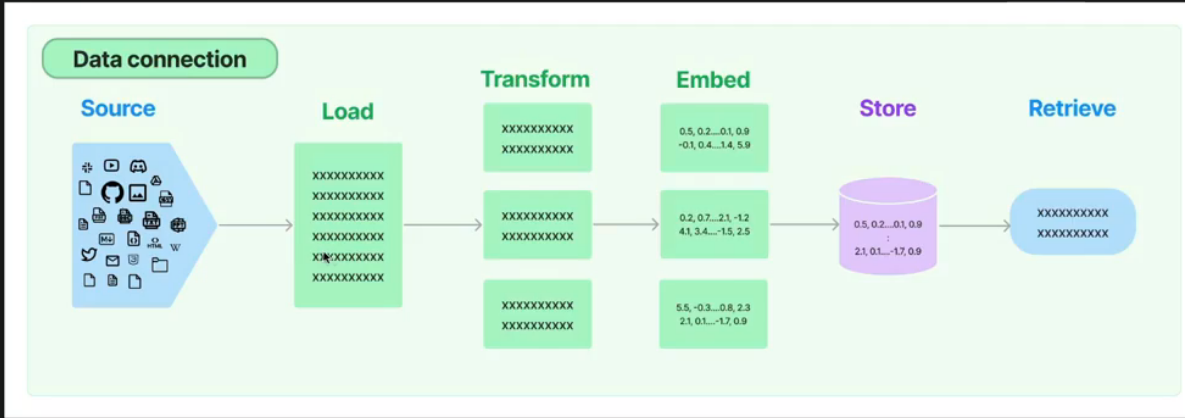

일단 data를 모으고 load에서 문서를 읽고 transform에서 분할하고 데이터를 임베드하고 ~~~
python.langchain.com/docs/integrations/document_loaders   --> 어떤 데이터들을 가져올 수 있는지 문서...

웹 페이지, 슬랙, 디스코드, ppt 등 여러 소스에서 데이터를 가져올 수 있다.



http://www.george-orwell.org/1984/0.html

** 주의할 내용 (1) **  
txt 파일과 docx 파일은 그냥 만들어도 되지만 pdf 파일은 그냥 작성하시면 에러가 발생합니다.  
chapter_one.md 파일에 작성하신 이후 VSCode의 확장 프로그램인 Markdown PDF를 사용하세요.  
확장 프로그램을 설치하신 후, chapter_one.md 파일에서 F1 --> Markdown PDF: export (pdf) 를 실행하시면 됩니다.  
생성하신 pdf 파일을 확인하시려면 VSCode의 확장 중 하나인 vscode-pdf 를 설치하시면 됩니다.

In [30]:
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import TextLoader

loader = TextLoader("./files/chapter_one.txt")

loader.load()

[Document(page_content="Part 1, Chapter 1\n\nPart One\n\n\n1\nIt was a bright cold day in April, and the clocks were striking thirteen. Winston Smith, his chin nuzzled into his breast in an effort to escape the vile wind, slipped quickly through the glass doors of Victory Mansions, though not quickly enough to prevent a swirl of gritty dust from entering along with him.\n\nThe hallway smelt of boiled cabbage and old rag mats. At one end of it a coloured poster, too large for indoor display, had been tacked to the wall. It depicted simply an enormous face, more than a metre wide: the face of a man of about forty-five, with a heavy black moustache and ruggedly handsome features. Winston made for the stairs. It was no use trying the lift. Even at the best of times it was seldom working, and at present the electric current was cut off during daylight hours. It was part of the economy drive in preparation for Hate Week. The flat was seven flights up, and Winston, who was thirty-nine and had

In [31]:
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import PyPDFLoader

loader = PyPDFLoader("./files/chapter_one.pdf")

loader.load()

[Document(page_content="chapter_one.md 2024-09-05\n1 / 9Part 1, Chapter 1\nPart One\n1 It was a bright cold day in April, and the clocks were striking thirteen. Winston Smith, his chin nuzzled into\nhis breast in an effort to escape the vile wind, slipped quickly through the glass doors of Victory Mansions,\nthough not quickly enough to prevent a swirl of gritty dust from entering along with him.\nThe hallway smelt of boiled cabbage and old rag mats. At one end of it a coloured poster, too large for indoor\ndisplay, had been tacked to the wall. It depicted simply an enormous face, more than a metre wide: the face of\na man of about forty-five, with a heavy black moustache and ruggedly handsome features. Winston made for\nthe stairs. It was no use trying the lift. Even at the best of times it was seldom working, and at present the\nelectric current was cut off during daylight hours. It was part of the economy drive in preparation for Hate\nWeek. The flat was seven flights up, and Winsto

In [33]:
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import UnstructuredFileLoader # TextLoader니 pdfLoader니 찾을 필요없이 한방에!

loader = UnstructuredFileLoader("./files/chapter_one.pdf")

loader.load()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sungj\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sungj\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


[Document(page_content="chapter_one.md\n\n2024-09-05\n\nPart 1, Chapter 1\n\nPart One\n\n1 It was a bright cold day in April, and the clocks were striking thirteen. Winston Smith, his chin nuzzled into\n\nhis breast in an effort to escape the vile wind, slipped quickly through the glass doors of Victory Mansions,\n\nthough not quickly enough to prevent a swirl of gritty dust from entering along with him.\n\nThe hallway smelt of boiled cabbage and old rag mats. At one end of it a coloured poster, too large for indoor\n\ndisplay, had been tacked to the wall. It depicted simply an enormous face, more than a metre wide: the face of\n\na man of about forty-five, with a heavy black moustache and ruggedly handsome features. Winston made for\n\nthe stairs. It was no use trying the lift. Even at the best of times it was seldom working, and at present the\n\nelectric current was cut off during daylight hours. It was part of the economy drive in preparation for Hate\n\nWeek. The flat was seven fl

In [35]:
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import UnstructuredFileLoader # TextLoader니 pdfLoader니 찾을 필요없이 한방에!

loader = UnstructuredFileLoader("./files/chapter_one.docx")

loader.load()

[Document(page_content="Part 1, Chapter 1\n\nPart One\n\n1\n\nIt was a bright cold day in April, and the clocks were striking thirteen. Winston Smith, his chin nuzzled into his breast in an effort to escape the vile wind, slipped quickly through the glass doors of Victory Mansions, though not quickly enough to prevent a swirl of gritty dust from entering along with him.\n\nThe hallway smelt of boiled cabbage and old rag mats. At one end of it a coloured poster, too large for indoor display, had been tacked to the wall. It depicted simply an enormous face, more than a metre wide: the face of a man of about forty-five, with a heavy black moustache and ruggedly handsome features. Winston made for the stairs. It was no use trying the lift. Even at the best of times it was seldom working, and at present the electric current was cut off during daylight hours. It was part of the economy drive in preparation for Hate Week. The flat was seven flights up, and Winston, who was thirty-nine and had

### 문서 분할
분할의 이유는 위의 출력을 보면 Document로 이뤄진 리스트임. 모든 내용이 하나로 들어가있음.  
문서가 너무 큰 덩어리기에 나누는 작업이 필요하다.  
예를들어 특정 단어를 찾는다고 치면, 하나로 되어 있으면 전체 문서를 반환하지만 분할해 두면 그 단어가 들어간 분할된 문서만 반환하면 된다.


In [37]:
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import UnstructuredFileLoader 
from langchain.text_splitter import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter()

loader = UnstructuredFileLoader("./files/chapter_one.docx")

loader.load_and_split(text_splitter=splitter) # 문장 끝이나 문단의 끝부분마다 끊어줌

[Document(page_content="Part 1, Chapter 1\n\nPart One\n\n1\n\nIt was a bright cold day in April, and the clocks were striking thirteen. Winston Smith, his chin nuzzled into his breast in an effort to escape the vile wind, slipped quickly through the glass doors of Victory Mansions, though not quickly enough to prevent a swirl of gritty dust from entering along with him.\n\nThe hallway smelt of boiled cabbage and old rag mats. At one end of it a coloured poster, too large for indoor display, had been tacked to the wall. It depicted simply an enormous face, more than a metre wide: the face of a man of about forty-five, with a heavy black moustache and ruggedly handsome features. Winston made for the stairs. It was no use trying the lift. Even at the best of times it was seldom working, and at present the electric current was cut off during daylight hours. It was part of the economy drive in preparation for Hate Week. The flat was seven flights up, and Winston, who was thirty-nine and had

In [38]:
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import UnstructuredFileLoader 
from langchain.text_splitter import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter(
    chunk_size=200, # 더 작은 단위로 분할 가능
)

loader = UnstructuredFileLoader("./files/chapter_one.docx")

loader.load_and_split(text_splitter=splitter)

[Document(page_content='Part 1, Chapter 1\n\nPart One\n\n1', metadata={'source': './files/chapter_one.docx'}),
 Document(page_content='It was a bright cold day in April, and the clocks were striking thirteen. Winston Smith, his chin nuzzled into his breast in an effort to escape the vile wind, slipped quickly through the glass doors', metadata={'source': './files/chapter_one.docx'}),
 Document(page_content='was a bright cold day in April, and the clocks were striking thirteen. Winston Smith, his chin nuzzled into his breast in an effort to escape the vile wind, slipped quickly through the glass doors of', metadata={'source': './files/chapter_one.docx'}),
 Document(page_content='cold day in April, and the clocks were striking thirteen. Winston Smith, his chin nuzzled into his breast in an effort to escape the vile wind, slipped quickly through the glass doors of Victory', metadata={'source': './files/chapter_one.docx'}),
 Document(page_content='day in April, and the clocks were striking

In [39]:
# 위와 같이 청크 단위로 하면 문장이 중간에 잘려서 쓸 수가 없다.
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import UnstructuredFileLoader 
from langchain.text_splitter import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter(
    chunk_size=200,
    chunk_overlap=50 # 문장이나 문단을 분할할때 앞 조각 일부분을 가져옴. 그러면 문서 사이에 겹치는 부분이 생김.(중복)
)

loader = UnstructuredFileLoader("./files/chapter_one.docx")

loader.load_and_split(text_splitter=splitter)

[Document(page_content='Part 1, Chapter 1\n\nPart One\n\n1', metadata={'source': './files/chapter_one.docx'}),
 Document(page_content='It was a bright cold day in April, and the clocks were striking thirteen. Winston Smith, his chin nuzzled into his breast in an effort to escape the vile wind, slipped quickly through the glass doors', metadata={'source': './files/chapter_one.docx'}),
 Document(page_content='wind, slipped quickly through the glass doors of Victory Mansions, though not quickly enough to prevent a swirl of gritty dust from entering along with him.', metadata={'source': './files/chapter_one.docx'}),
 Document(page_content='The hallway smelt of boiled cabbage and old rag mats. At one end of it a coloured poster, too large for indoor display, had been tacked to the wall. It depicted simply an enormous face, more than a', metadata={'source': './files/chapter_one.docx'}),
 Document(page_content='It depicted simply an enormous face, more than a metre wide: the face of a man of 

In [40]:
# 위의 출력물을 보면 첫번째와 두번째가 조금 중복되어 있다.
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import UnstructuredFileLoader 
from langchain.text_splitter import CharacterTextSplitter 
# RecursiveCharacterTextSplitter와 비슷함. 다른 점은 seperator가 있다는 점

splitter = CharacterTextSplitter(
    separator="\n",
    chunk_size=600, 
    chunk_overlap=100
)

loader = UnstructuredFileLoader("./files/chapter_one.docx")

loader.load_and_split(text_splitter=splitter)

Created a chunk of size 963, which is longer than the specified 600
Created a chunk of size 774, which is longer than the specified 600
Created a chunk of size 954, which is longer than the specified 600
Created a chunk of size 922, which is longer than the specified 600
Created a chunk of size 1168, which is longer than the specified 600
Created a chunk of size 821, which is longer than the specified 600
Created a chunk of size 700, which is longer than the specified 600
Created a chunk of size 745, which is longer than the specified 600
Created a chunk of size 735, which is longer than the specified 600
Created a chunk of size 1110, which is longer than the specified 600
Created a chunk of size 991, which is longer than the specified 600
Created a chunk of size 990, which is longer than the specified 600
Created a chunk of size 1741, which is longer than the specified 600
Created a chunk of size 2001, which is longer than the specified 600
Created a chunk of size 1900, which is longe

[Document(page_content='Part 1, Chapter 1\nPart One\n1\nIt was a bright cold day in April, and the clocks were striking thirteen. Winston Smith, his chin nuzzled into his breast in an effort to escape the vile wind, slipped quickly through the glass doors of Victory Mansions, though not quickly enough to prevent a swirl of gritty dust from entering along with him.', metadata={'source': './files/chapter_one.docx'}),
 Document(page_content='The hallway smelt of boiled cabbage and old rag mats. At one end of it a coloured poster, too large for indoor display, had been tacked to the wall. It depicted simply an enormous face, more than a metre wide: the face of a man of about forty-five, with a heavy black moustache and ruggedly handsome features. Winston made for the stairs. It was no use trying the lift. Even at the best of times it was seldom working, and at present the electric current was cut off during daylight hours. It was part of the economy drive in preparation for Hate Week. The 

Created a chunk of size 922, which is longer than the specified 600
Created a chunk of size 1168, which is longer than the specified 600
이런식으로 실제 청크사이즈보다 크게 분할될 수 있어. seperator가 없으니까 중간에 자를수가 없어서

기본적으로 모든 splitter들은 텍스트의 length를 계산해서 한 덩어리의 chunk 크기를 알아낸다.
그 작업에 파이썬 표준 라이브러리가 지원하는 len함수를 쓰는데, 이 함수 대신 다른 custom 함수를 넣을 수도 있다.

In [ ]:
splitter = CharacterTextSplitter(
    separator="\n",
    chunk_size=600, 
    chunk_overlap=100,
    length_fuction=len # 여기서 설정
)

loader = UnstructuredFileLoader("./files/chapter_one.docx")

loader.load_and_split(text_splitter=splitter)

토큰은 글자 단위가 아니다. 그때그떄 다른데, model 관점에서 몇개의 token을 사용하는지 알아볼 수 있다.
platform.openai.com/tokenizer

In [ ]:
splitter = CharacterTextSplitter.from_tiktoken_encoder( # 어쨌든 length_fucntion 설정을 위해서는 from_tiktoken_encoder를 써야함
    separator="\n",
    chunk_size=600, 
    chunk_overlap=100,
    length_fuction=len # 여기서 설정
)

loader = UnstructuredFileLoader("./files/chapter_one.docx")

loader.load_and_split(text_splitter=splitter)



## Embedding
사람이 읽는 텍스트를 컴퓨터가 이해할 수 있는 숫자들로 변환하는 작업

### 벡터화
우리가 만든 문서마다 각각의 벡터를 만든다.  

OpenAI는 1000차원을 하지만 우리는 일단 3차원해보자

|        |    Masculinity(남성성) | Femininity(여성성) | Royalty(왕족스러움?)|
|----------|-----------|-----------|-------|
|  king    |   0.9     |   0.1     |   1.0 |
|  queen   |   0.1     |   0.9     |   1.0 |
|  man     |   0.9     |   0.1     |   0.0 |
|  woman   |   0.1     |   0.9     |   0.0 |

단어를 위와 같이 차원으로 표현하면 다른 단어를 얻기 위해 가진 단어를 가지고 연산을 할 수 있다.  
king - man은?       0 | 0 | 1
이렇게 되면 이 단어는 뭘까? royal이 된다.

royal + woman은?    0.1 | 0.9 | 1    
위 단어에 대해서 어디서 보지 않았나? 위의 표에서 queen과 같다.  

이런식으로 변환하는 것을 embedding하는 것이다.  

turbomaze.github.io/word2vecjson  ---> 단어를 입력하면 비슷한 벡터를 가진 단어들을 보여주는 사이트  

우리가 벡터를 llm에게 전달하지 않아. 내부적으로 벡터들을 사용해서 비슷한 문서들을 검색하는 거지..

In [44]:
# 임베딩하는 법
from langchain.embeddings import OpenAIEmbeddings

embedder = OpenAIEmbeddings()

vector=embedder.embed_query("Hi")
print(vector)

[-0.03637292483622222, -0.0071586398622948974, -0.03374136096384863, -0.02863455944917959, -0.02683675658053588, 0.03457512196757851, -0.012441311878261738, -0.007816531296049613, 0.0019297060938630506, -0.0026511067466092933, 0.024700239119034212, -0.002454065186273913, -0.0057744625228963314, -0.0029849377163842583, 0.006670106656291796, -0.0030223920204245553, 0.03379347032808977, -0.0015111960102122777, 0.021052524017505653, -0.009028093572431494, -0.021703902246391547, 0.010369931122061495, 0.006302078217741605, 0.007093501760009517, -0.012252412638919696, 0.0008191073405129948, 0.005872168977832424, -0.009835801756686078, -0.0030451903329413725, -0.0247132664600945, 0.01078029888471893, -0.013822232382395232, -0.024491797936779105, -0.014108838542334686, 0.00244429444764804, -0.018968115920245127, 0.0005850185223377864, -0.011373053147510906, 0.01813435305386997, -0.00995956335940406, 0.013118744789268201, -0.01129488723850392, -0.009158368845679617, -0.009712040153968099, -0.026

In [45]:
len(vector)

1536

In [46]:
# 위와같이 Hi 단어에 대해 벡터값을 리턴한다. 벡터 길이를 보면 1536으로 1536개의 차원을 가진것이다.
# 문서를 embedding해보자
from langchain.embeddings import OpenAIEmbeddings

embedder = OpenAIEmbeddings()

vector=embedder.embed_documents(["Hi", "How", "are", "you", "you longer sentence"])
print(vector)

[[-0.03637292483622222, -0.0071586398622948974, -0.03374136096384863, -0.02863455944917959, -0.02683675658053588, 0.03457512196757851, -0.012441311878261738, -0.007816531296049613, 0.0019297060938630506, -0.0026511067466092933, 0.024700239119034212, -0.002454065186273913, -0.0057744625228963314, -0.0029849377163842583, 0.006670106656291796, -0.0030223920204245553, 0.03379347032808977, -0.0015111960102122777, 0.021052524017505653, -0.009028093572431494, -0.021703902246391547, 0.010369931122061495, 0.006302078217741605, 0.007093501760009517, -0.012252412638919696, 0.0008191073405129948, 0.005872168977832424, -0.009835801756686078, -0.0030451903329413725, -0.0247132664600945, 0.01078029888471893, -0.013822232382395232, -0.024491797936779105, -0.014108838542334686, 0.00244429444764804, -0.018968115920245127, 0.0005850185223377864, -0.011373053147510906, 0.01813435305386997, -0.00995956335940406, 0.013118744789268201, -0.01129488723850392, -0.009158368845679617, -0.009712040153968099, -0.02

In [48]:
# 실행할때마다 문서 embed를 반복하기 싫어서 embed 캐싱하는걸 해보자. 문서가 바뀌지 않는 이상 embed를 또 할 필요는 없다.
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import UnstructuredFileLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings, CacheBackedEmbeddings
from langchain.vectorstores import Chroma
from langchain.storage import LocalFileStore

cache_dir = LocalFileStore("./.cache/")


splitter = CharacterTextSplitter.from_tiktoken_encoder(
    separator="\n",
    chunk_size=600,
    chunk_overlap=100,
)
loader = UnstructuredFileLoader("./files/chapter_one.docx")

docs = loader.load_and_split(text_splitter=splitter)

embeddings = OpenAIEmbeddings()

cached_embeddings = CacheBackedEmbeddings.from_bytes_store(embeddings, cache_dir)

vectorstore = Chroma.from_documents(docs, cached_embeddings)

RuntimeError: [91mYour system has an unsupported version of sqlite3. Chroma requires sqlite3 >= 3.35.0.[0m
[94mPlease visit https://docs.trychroma.com/troubleshooting#sqlite to learn how to upgrade.[0m